# XGBoostインストール

xgboostをインストールしてない環境ではXGBoostをインストールする必要があります。

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install japanize-matplotlib

  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-py3-none-any.whl size=4120198 sha256=8c7e55433a5a1f63450bb54b5cacd338d44badb04c29766e3bec6b2063790c16
  Stored in directory: c:\users\aikim\appdata\local\pip\cache\wheels\b8\71\bc\6a1a58cd7cc4bce671a46deb4ded4d1ef1d7327209d5ab4680
Successfully built japanize-matplotlib
Note: you may need to restart the kernel to use updated packages.


# [1-1]XGBoostモジュールをインボート

In [28]:
import xgboost as xgb

# [1-2]irisデータの取得

特別な手順はありません。irisデータを取得して、pandasのDataFrameとSeriesを作成します。

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import load_iris



iris = load_iris()

iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_target = pd.Series(iris.target)


C:\ProgramData\Anaconda3\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [30]:
print(iris_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


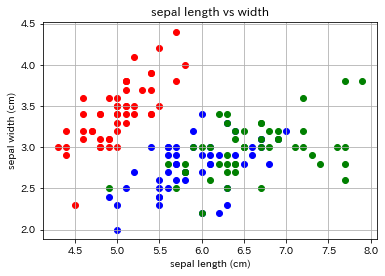

In [31]:
iris_dataframe1 = pd.DataFrame(iris.data[:50])
iris_dataframe2 = pd.DataFrame(iris.data[50:100])
iris_dataframe3 = pd.DataFrame(iris.data[100:150])

plt.scatter(iris_dataframe1[0], iris_dataframe1[1], c="red")
plt.scatter(iris_dataframe2[0], iris_dataframe2[1], c="blue")
plt.scatter(iris_dataframe3[0], iris_dataframe3[1], c="green")

#以下で散布図の見た目の設定をしています。
plt.title('sepal length vs width')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.grid(True)

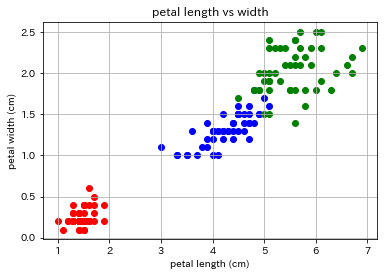

In [32]:
#matplotlibで散布図を描く
plt.scatter(iris_dataframe1[2], iris_dataframe1[3], c="red")
plt.scatter(iris_dataframe2[2], iris_dataframe2[3], c="blue")
plt.scatter(iris_dataframe3[2], iris_dataframe3[3], c="green")

#以下で散布図の見た目の設定をしています。
plt.title('petal length vs width')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.grid(True)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
     0
0    0
1    0
2    0
3    0
4    0
..  ..
145  2
146  2
147  2
148  2
149  2

[150 rows x 1 columns]
     がくの長さ  がくの幅  花びらの長さ  花びらの幅  target
0      5.1   3.5     1.4    0.2       0
1      4.9   3.0     1.4    0.2       0
2      4.7   3.2     1.3    0.2       0
3      4.6   3.1     1.5    0.2       0
4      5.0   3.6     1.4    0.2       0
..     ...   ...     ...    ...     ...
145    6.7   3.0     5.2    2.3       2
146    6.3   2.5     5.0    1.9       2
147    6.5   3.0     5.2    2.0       2
148    6.2   3.4     5.4    2.3       2
149    5.9   3.0     5.1    1.8       2

[150 rows x 5 columns]


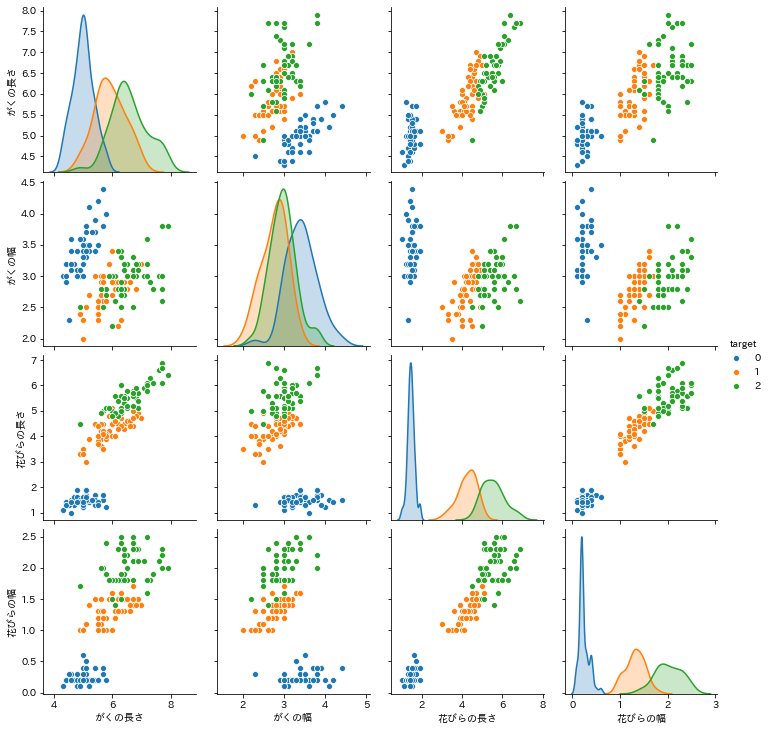

In [33]:
iris_data = pd.DataFrame(iris.data)
#iris_data変数を表示
print(iris_data)

iris_target_dataframe = pd.DataFrame(iris.target)
print(iris_target_dataframe)

#表の結合
md = pd.merge(iris_data, iris_target_dataframe, left_index=True, right_index=True)

#結合した表の列名をつける。
md.columns = ['がくの長さ', 'がくの幅', '花びらの長さ', '花びらの幅', 'target']
print(md)

#図の作成と表示、表示までに数秒の時間がかかります。
sns.pairplot(md, hue="target")

# [1-3]訓練データとテストデータの取得

scikit-learnのtrain_test_splitでデータを訓練用とテスト用に分割します。

In [34]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(iris_data, iris_target, test_size=0.2, shuffle=True)

# [1-4]xgboost用の型に変換する

xgboostではDMatrixを使用します。

DMatrixはnumpyのndarrayやpandasのDataFrameから作成できるので、データの扱いに苦労することは無いでしょう。

In [35]:
dtrain = xgb.DMatrix(train_x, label=train_y)

# [1-5]パラメータの設定

各種パラメータの設定を行います。

各パラメータの意味は次の通りです。

パラメータ名	意味
max_depth	木の最大深度
eta	学習率
objective	学習目的
num_class	クラス数
'objejective'に学習目的(回帰、分類等)を指定します。
今回は多クラス分類なので'multi:softmax'を指定しています

In [36]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax', 'num_class': 3}

# [1-6]学習

num_roundは学習回数です。

In [37]:
num_round = 10
bst = xgb.train(param, dtrain, num_round)

# [1-7]予測

In [38]:
dtest = xgb.DMatrix(test_x)
pred = bst.predict(dtest)

# [1-8]精度の確認

scikit-learnのaccuracy_scoreで正解率を確認します。

In [39]:
from sklearn.metrics import accuracy_score

score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))

score:0.9667


# [1-9]重要度の可視化

どの特徴量が予測結果に寄与したのかを可視化します。

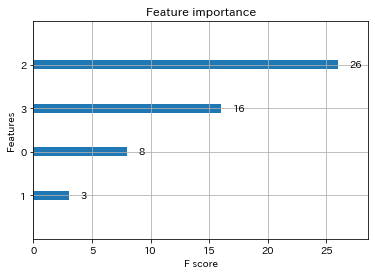

In [40]:
xgb.plot_importance(bst)